## Project (E) 448
## Linear Regression - Multi-Dimensional Predictive Distribution
## Demonstration: Weather Sample
### Daniël S. van der Westhuizen
### 17158680

In [1]:
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *

Here is another demonstration of the prediction using linear regression.

The input space is the date, the minimum temperature, and the maximum temperature of a weather station. The output is the precipitation

In [2]:
from numpy import loadtxt
lines = loadtxt("weather_station_sample_new.csv", comments="#", delimiter=",", usecols = (5,6,7,8), unpack=False)

In [3]:
for b in range(0,365):
    lines[b,0] = b
for a in range(0,3):
    lines[:,a] = (lines[:,a] - np.average(lines[:,a]))  / (np.average(np.abs(lines[:,a])))

The data of every second day is used as the training data. All the samples will be the test data.

In [4]:
n = 2 #training data is every nth day
N_train = (int)((365/n)//1)
foo = np.linspace(1,365,N_train)//1
foo = np.ones(N_train,dtype=np.int16)
for a in range(0,N_train):
    foo[a] = foo[a]*a*2
train_y = lines[foo,3]
train_x = lines[foo,:3]
test_x = lines[:,:3]
test_y = lines[:,3]

D = 3 #input dimensionality
M = 8 #basis function ticks for each dimension (i.e. M^D basis functions)
alpha = 1
beta = 5
s = 0.3

Let's first test it by setting M = 5. That means there will be D^M = 3^5 = 243 basis functions.

In [30]:
means = np.zeros((M**D,D))
done = 0
mu_vector_amount = M**D
row_count = 0
column_count = 0
for a in range(0,mu_vector_amount*D):
    means[row_count,column_count] = ( (row_count//(M**column_count))%M*2/(M-1)) - 1
    row_count += 1
    if (row_count == mu_vector_amount):
        row_count = 0
        column_count += 1

In [31]:
design_matrix = np.zeros((N_train,M**D))
for a in range(0,M**D):
    for b in range(0,N_train):
        design_matrix[b,a] = basis(train_x[b,:],means[a,:],s)
S_N = inv( alpha*(np.identity(M**D)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(train_y).transpose() ) )

In [32]:
pred_means = np.zeros(np.shape(test_x)[0])
for b in range(0,np.shape(test_x)[0]):
    
    phi_vector_pred = np.zeros(M**D)
    for a in range(0,M**D):
        phi_vector_pred[a] = basis(test_x[b,:],means[a],s)
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()

    pred_means[b] = np.dot( m_N.transpose(), phi_vector_pred )

The calculations was completed in a moment

Results:

In [33]:
print("average of the predicted precipitation:",np.average(pred_means))
print("average of the actual precipitation:",np.average(test_y))
pred_error = np.average(np.abs(pred_means - test_y))
print(pred_error)

average of the predicted precipitation: 5.55043270768
average of the actual precipitation: 5.5397260274
0.458596200295


Here are the predicted results for various values of M:

M=4: 4.74  1.2

M=5: 5.39  0.601

M=6: 5.49   0.465

M=7: 5.40   0.44

M=8: 5.531   0.425

M=9: 5.54   0.42  (Here the calculations took a few seconds)

M=10: 5.54   0.418

In [13]:
pred_means[6]

1.8607386952375067

In [14]:
test_y[6]

2.0

In [8]:
error_array = np.zeros(8)
test_pred_error_vari_array = np.zeros(8)
calc_time_array = np.zeros(8)
for a in range(3,11):
    q,w,e,r,t = lin_reg_pred_distrib(train_x,train_y,test_x,test_y,a,alpha,beta,s)
    error_array[a-3] = e
    test_pred_error_vari_array[a-3] = r
    calc_time_array[a-3] = t

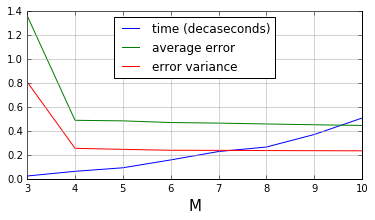

In [9]:
%matplotlib inline
pl.figure(figsize=(6,3))
plot_x = np.linspace(0,7,8) + 3
pl.plot(plot_x,calc_time_array/10,label='time (decaseconds)')
pl.plot(plot_x,error_array,label='average error')
pl.plot(plot_x,test_pred_error_vari_array,label='error variance')
pl.legend(loc='upper center')
pl.xlabel('M', fontsize=15)
pl.locator_params(axis = 'x', nbins = 8)
pl.grid(b=True, which='both', color='0.65',linestyle='-')